# Qu'est-ce que le machine learning?

Le ML permet de construire des fonction avec des paramètres qui sont appris par rapport à des données et s'adaptant à celles-ci. 

Adapté du cours de Gaël Varoquaux

In [1]:
# Afin d'avoir les figures dans le notebook
%matplotlib inline 

# Structure des données dans scikit-learn

La plupart des algos de ML implémenté dans scikit-learn attendent des données de la forme d'**array bi-dimensionnels ou de matrices**. Les arrays peuvent être ``numpy`` arrays, ou alors des matrices ``scipy.sparse``.
La taille de l'array est `[n_samples, n_features]`
- **n_samples:**   Le nombre d'exemples/échantillon (sample): chaque sample est une objet à traiter (classifier par ex). Cela peut être un document, une image, un son, une ligne d'un fichier CSV... 
- **n_features:**  Le nombre de descripteurs utilisés pour décrire les données. Ils peuvent être réels, discrets, ou bien booléens.    

Le nombre de descripteurs  `n_features` est fixé en avance. Ce nombre peut etre très grand, voire des millions avec la plupart des valeurs étant égales à zero pour un échantillon donné. C'est un des cas où l'utilisation de ``scipy.sparse`` peut être utile. 

### Un Example Simple: Dataset Iris 

Pour commencer, nous allons étudier un exemple de dataset simple qui est stocké dans scikit-learn. Les données sont des mesures concernant 3 especes d'iris :

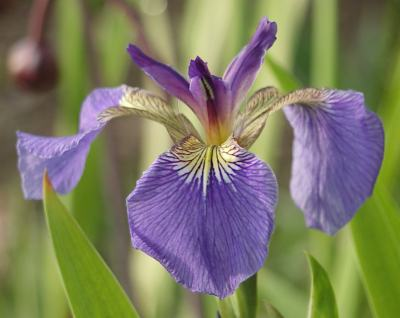

Iris Setosa



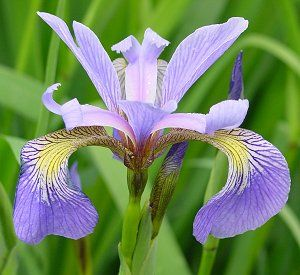

Iris Versicolor



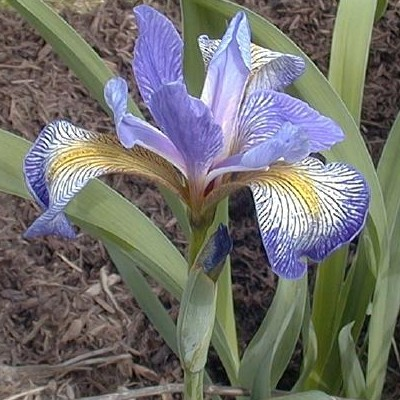

Iris Virginica


In [2]:
# Pour voir les images
from IPython.core.display import Image, display
display(Image(filename='iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='iris_virginica.jpg'))
print("Iris Virginica")

### Question simple :

**Si l'on veut créer un modèle reconnaissant les especes d'iris, que pourraient être les données ?**

Rappel : nous avons besoin d'un array de taille `[n_samples x n_features]`.

- A quoi `n_samples` refere-t-il ?

- A quoi `n_features` refere-t-il ?

Rappelez-vous que le nombre de features doit être **fixe** pour chaque exemple du dataset. 

### Charger l'Iris Data avec Scikit-learn

Scikit-learn a des données simples sur ces types d'iris. Les données consisitent en :

- Features dans le dataset Iris :

  1. longueur du sepale en cm
  2. largeur du sepale en cm
  3. longueur du petale en cm
  4. largeur du petale en cm

- Classes cibles à prédire :

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

``scikit-learn`` integre une copie du csv de donnée iris qui est disponible via une fonction permettant de le charger  en arrays numpy:

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

Les descripteurs de chaque echantillon sont stocké dans l'attribut ``data`` du dataset : 

In [4]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)
print(iris.data[0])

150
4
[ 5.1  3.5  1.4  0.2]


D'autres informations sont stockés dans l'attirbut ``target`` de la base de données :

In [5]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Les noms des classes sont dans ``target_names``:

In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Les données ont 4 dimensions, mais il est cependant possible de les visualiser une par une avec un scatter-plot. 
Une fois de plus, on autorise matplotlib à l'interieur du notebook :

In [8]:
from matplotlib import pyplot as plt

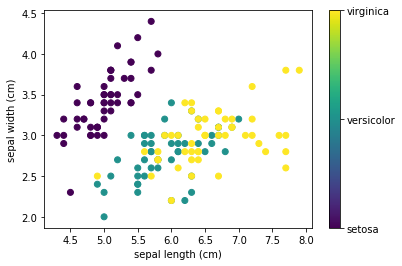

In [9]:
x_index = 0
y_index = 1

def print_graph(x_index, y_index):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

    plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris.feature_names[x_index])
    plt.ylabel(iris.feature_names[y_index]);
    
print_graph(x_index, y_index)

**Exercice**: Pouvez-vous choisir x_index et y_index d'une manière à ce que ce soit plus simple de séparer les classes des iris ? 

In [ ]:
#TODO

TOFILL

## Maintenant, prédisons

Mettre les données sous la bonne forme : 

- `X` pour les features 
- `y` pour les labels

In [3]:
X = iris.data
y = iris.target

Création du classifieur, nous choisissons la regression logistique 

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10)
lr.fit(X,y)

/Users/Valou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=10)

Testons un apprentissage et un test sur le même ensemble de données

In [17]:
lr.score(X, y)

0.9733333333333334

Maintenant, on veut mesurer les performances de notre modèle sur ces mêmes données : on import f1_score, recall et precision

In [18]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report

In [22]:
print(classification_report(y, lr.predict(X), target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      0.92      0.96        50
   virginica       0.93      1.00      0.96        50

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.98      0.97      0.97       150



Les résultats sont très bons, mais nous n'avons pas fait de validation croisée : utilisons la fonction train_test_split

In [24]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=43)

In [45]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.98

Cette base de données est tres simple... 